# **Laboratorio 4: Descenso de gradiente**
# En esta práctica, realizamos una regresión no lineal para tratar de predecir el tiempo que obtendrá el ganador de la carrera de 100 metros planos masculino en los Juegos Olímpicos de 2016, utilizando los tiempos históricos de los ganadores.

Nuestro objetivo es utilizar la regresión no lineal para demostrar todo el proceso de Machine Learning: definir un modelo, optimizar los parámetros de ese modelo a partir de los datos (aprendizaje) y luego evaluar el rendimiento del modelo.

Comenzamos cargando los datos de la base de datos Olympic de la URL (https://raw.githubusercontent.com/sdrogers/fcmlcode/master/notebooks/data/olympic100m.txt) . A continuación seleccione los correspondientes a los hombres en la categoría de 100 metros. Luego copiar las columnas primera y segunda en las variables numpy $x$ y $y$.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline
# Cargamos datos
data = pd.read_csv('housing.csv')

x = np.array(data.LSTAT)
y = np.array(data.MDEV)
#data = urllib.request.urlretrieve('https://raw.githubusercontent.com/sdrogers/fcmlcode/master/notebooks/data/olympic100m.txt', 'olympic100m.txt')

#data = np.loadtxt('olympic100m.txt',delimiter=',')

#x = np.array(data[:,0])
#y = np.array(data[:,1])





In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

u = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)
X = (X_train - u )/std
Y = y_train
x_tr, x_val, y_tr, y_val = train_test_split(X, Y, test_size=0.2, random_state=0)

print(np.shape(x_tr), np.shape(y_tr))

(234,) (234,)


# 1.- Visualización de los datos
Siempre es útil comenzar con una gráfica de los datos. Puede utilizar *matplotlib* para visualizar los datos.

Tenga en cuenta utilizar el comando mágico *%matplotlib inline*  que le dice al Jupyter Notebook que renderice las celdas en el navegador y que no las archive.

Text(0.5, 0, 'Años')

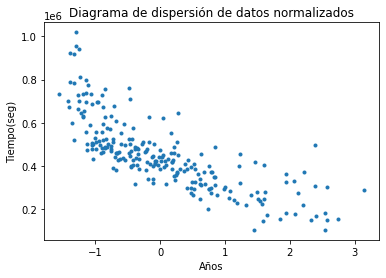

In [21]:
#Gráfica de los datos
plt.plot(x_tr,y_tr,'.')
plt.title('Diagrama de dispersión de datos normalizados')
plt.ylabel('Tiempo(seg)')
plt.xlabel('Años')


# 2.- Modelo no lineal utilizando descenso de gradiente estocástico

Con los datos de entrenamiento, encontrar el modelo no lineal utilizando descenso de gradiente
$${\bf w}^{(l+1)}={\bf w}^{(l)}-\eta \frac{\partial{\cal L}({ y}^{(l)}, \hat{y}^{(l)})}{\partial{\bf w}^{(l)}}$$


In [22]:
K = 3 #Grado del polinómio
Xtr = np.vander(x_tr,K,increasing=True)
Xval = np.vander(x_val,K,increasing=True)
print(Xtr)

[[ 1.00000000e+00  1.65659072e-01  2.74429283e-02]
 [ 1.00000000e+00 -8.19159661e-01  6.71022551e-01]
 [ 1.00000000e+00 -4.54146904e-01  2.06249410e-01]
 [ 1.00000000e+00  5.24946139e-01  2.75568449e-01]
 [ 1.00000000e+00  2.78741456e-01  7.76967993e-02]
 [ 1.00000000e+00 -5.97289162e-01  3.56754343e-01]
 [ 1.00000000e+00  2.06372541e+00  4.25896257e+00]
 [ 1.00000000e+00  2.54611482e+00  6.48270068e+00]
 [ 1.00000000e+00  2.38865834e+00  5.70568865e+00]
 [ 1.00000000e+00  1.07318099e+00  1.15171743e+00]
 [ 1.00000000e+00 -7.23254349e-01  5.23096853e-01]
 [ 1.00000000e+00  6.17988607e-01  3.81909918e-01]
 [ 1.00000000e+00  8.54994080e-02  7.31014877e-03]
 [ 1.00000000e+00  1.00733555e+00  1.01472491e+00]
 [ 1.00000000e+00 -8.56376648e-01  7.33380964e-01]
 [ 1.00000000e+00 -6.30211881e-01  3.97167015e-01]
 [ 1.00000000e+00 -6.55977488e-01  4.30306464e-01]
 [ 1.00000000e+00  1.50260776e+00  2.25783008e+00]
 [ 1.00000000e+00 -6.86037362e-01  4.70647262e-01]
 [ 1.00000000e+00 -1.06679577e+

In [0]:

def predice(x,w):
    y_ = 0.0
    N = x.shape[0]
    for n in range(N):
        y_ += w[n] * x[n]
    return y_

    

In [0]:
def error(X,y,w):
    L,N = X.shape
    e = 0.0
    for i in range(L):
        y_ = predice(X[i],w)
        e += (y_ - y[i])**2
    return e/L

def gradiente(X,y,w):
    
    L,N = X.shape
    grad = np.zeros((N,))
    #Para todas las caracteristicas
    for j in range(N):
        for i in range(L):
            y_ = predice(X[i],w)
            grad[j] += (y_ - y[i] )*X[i][j]
    return grad/L

def DescensoGradiente(X,Y,Xval,Yval,eta = 0.01,epocas = 200):
    L,N = X.shape
    w = np.zeros((N,))
    error_tr = []
    error_val = []
    for i in range(epocas):
        e = error(X,Y,w)
        error_tr.append(e)
        grad = gradiente(X,Y,w)
        for j in range(N):
            w[j] = w[j] - eta * grad[j]
        e_val = error(Xval,Yval,w)
        error_val.append(e_val)
    return w, error_tr, error_val 

In [0]:
w , error_tr, error_val = DescensoGradiente(Xtr,y_tr,Xval,y_val)



Los pesos entrenados son :[ 323716.06110862 -166887.53840059   71642.43937328]


Text(0.5, 0, 'Epocas')

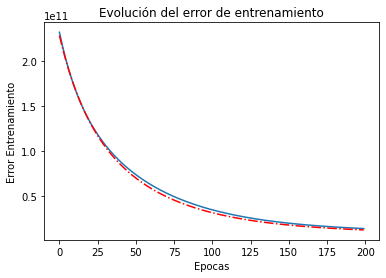

In [58]:
print('Los pesos entrenados son :' + str(w))
plt.plot(error_tr)
plt.plot(error_val,'-.r')
plt.title('Evolución del error de entrenamiento')
plt.ylabel('Error Entrenamiento')
plt.xlabel('Epocas')

## 2.1.- Cálcular el error de entrenamiento

$${ E}({\bf w})= \frac{1}{L}\sum_{l=1}^{L}{\left( { y }^{(l)}-\hat{ y}^{(l)} \right)^2}$$

In [63]:
# Cálculo del error de entrenamiento

E_tr = error(Xtr,y_tr,w)

xtst = (X_test - u )/std
Xtst = np.vander(xtst,K,increasing=True)

E_tst= error(Xtst,y_test,w)

print('El error de test :' + str(E_tst) )


El error de test :18222687812.298756


## 2.2.- Gráficar la solución

In [64]:
#Gráfica de la solución
y_pred = np.zeros(xtst.shape[0])
for i in range(xtst.shape[0]):
    y_pred[i] = predice(xtst[i],w)
    

ind = np.argsort(x_test, axis=0)
x_sort =np.take_along_axis(x_test, ind, axis=0)

y_pred = np.asarray(y_pred)
y_sort= np.take_along_axis(y_pred, ind, axis=0)

plt.plot(x_sort,y_sort)
plt.title('Modelo entrenado con descenso de gradiente')
plt.ylabel('Tiempo(seg)')
plt.xlabel('Años')

IndexError: ignored

# 3.- Realizar predicción

Predecir el tiempo que obtendrá el ganador de la carrera de 100 metros planos masculino en los Juegos Olímpicos de 2016, utilizando los tiempos históricos de los ganadores.

In [0]:
# Predicción
xnew = np.array([2016])

X = (xnew - u )/std

Xtst = np.vander(X,K,increasing=True)

for i in range(Xtst.shape[0]):
    y_hat = predice(Xtst[i],w)

print('El tiempo estimado es : '+str(y_hat))

El tiempo estimado es : 12.325378901415364


## 3.1.- Cálcular el error de prueba (test)


In [0]:
# Error de prueba
# El tiempo de los 100 mestros planos de las olimpiadas 2016 fue de 9.81
ytst = np.array([9.81])

Etst = np.mean((ytst-y_hat)**2)

print('El error de test es :' + str(Etst))

El error de test es :6.327131017685563


## 3.2.- Gráficar la predicción sobre los datos de entrenamiento
 

Text(0.5, 0, 'Años')

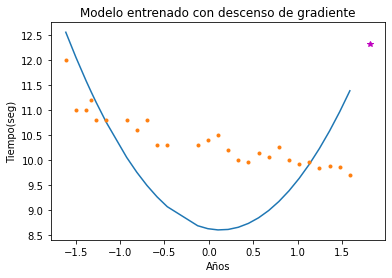

In [0]:
#Gráfica de la predicción


ind = np.argsort(x, axis=0)
x_sort =np.take_along_axis(x, ind, axis=0)

y_pred = np.asarray(y_pred)
y_sort= np.take_along_axis(y_pred, ind, axis=0)

plt.plot(x_sort,y_sort)
plt.plot(x,y,'.')
plt.plot(X,y_hat,'*m')
plt.title('Modelo entrenado con descenso de gradiente')
plt.ylabel('Tiempo(seg)')
plt.xlabel('Años')
